In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещённую и несмещённую оценки дисперсии для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
salaries = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
salaries_avg = salaries.mean()
salaries_count = salaries.shape[0]
print('Среднее арифметическое: ', salaries.sum()/salaries_count, '\n', salaries_avg)


Среднее арифметическое:  65.3 
 65.3


In [3]:
y_values = (salaries - salaries_avg)**2
prob = y_values.dot(1/salaries_count)
salaries_std = np.sqrt(prob.sum())

print('Cреднее квадратичное отклонение: ', salaries_std, '\n', salaries.std())

#salaries_std = np.sqrt(((df['height'] - df['height'].mean())**2).sum() / df['height'].count())

Cреднее квадратичное отклонение:  30.8238543988256 
 30.823854398825596


In [4]:
print('Дисперсия: ', salaries_std**2, '\n', salaries.var(ddof=0))
print('Несмещенная дисперсия: ', salaries_std**2*salaries_count/(salaries_count-1), '\n', salaries.var(ddof=1))

Дисперсия:  950.1100000000002 
 950.11
Несмещенная дисперсия:  1000.1157894736845 
 1000.1157894736842


Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. 
Найти выбросы в выборке, используя для этого "усы" из boxplot.

В этой задаче также нельзя использовать статистические функции. 
Неоднозначности в вычислении квантилей можно разрешать любым способом.

In [28]:
sal_sort = np.sort(salaries) 
sal_sort 
q1 = (sal_sort[5] + sal_sort[4])/2
q3 = (sal_sort[15]+ sal_sort[14])/2
iqr = q3-q1
print(q1)
print(q3)
print('Интерквартильное расстояние', iqr)

39.0
82.0
Интерквартильное расстояние 43.0


In [16]:
q1 = np.quantile(salaries, 0.25)
q3 = np.quantile(salaries, 0.75)
iqr = q3-q1
print(q1)
print(q3)
print('Интерквартильное расстояние', iqr)

42.0
81.0
Интерквартильное расстояние 39.0


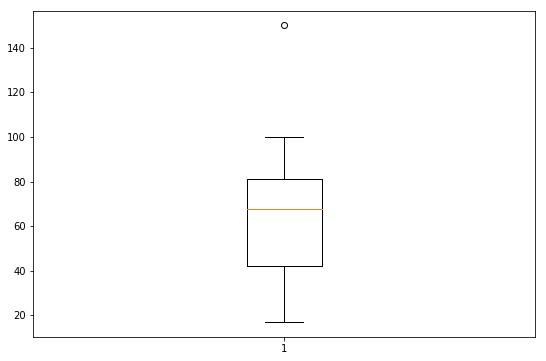

In [15]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(salaries)

In [18]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [19]:
vybros = salaries[salaries > 139.5]
vybros 

array([150])

Задача 3

Для распределения Пуассона с параметром a = 5 найти теоретические 
(т.е. используя закон распределения, а не выборку) мат. ожидание, моду и медиану.

Для распределения Пуассона математическое ожидание равно a, т.е. 5 (из методички). 
Это распределение имеет один пик.
Мода также как и медиана, равна числу a.

Задача 4

В университет на факультеты A и B поступило равное количество студентов, 
а на факультет C студентов поступило столько же, сколько на A и B вместе. 
Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. 
Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. 
Студент сдал первую сессию. Какова вероятность, что он учится:
    a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, 
и её стоит иногда освежать в памяти.

Пусть N -  число поступивших студентов.
на факультет A поступило 0.25*N
на факультет B поступило 0.25*N
на факультет C поступило 0.5*N
после первой сессии на факультете A останется 0.25*N*0.8 студентов
на факультете B останется 0.25*N*0.7 студентов
на факультете C останется 0.5*N*0.9 студентов
Тогда вероятность, что после первой сессии студент 
на факультете A = 0.8*0.25/(0.8*0.25+0.7*0.25+0.9*0.5) = 0.2/0.825 = 24,2%
на факультете B = 0.175/0.825 = 21,2%
на факультете С = 0.45/0.825 = 54,6%

